# Neural Network 
### CIC Data Science Project
By: ....,Neidy Malaga,... (Alphabetical Order)



#### Step 1: Beginning Setup
We use Panda in order to read cvs files. We use ".head()" function to display 5 rows and to see if it was read properly.
Our project compares genres (listed_in column) over years (release_year).

In [21]:
import pandas as pd
from sklearn.compose import ColumnTransformer

Spotify_Data = pd.read_csv('Popular_Spotify_Songs.csv')
Spotify_Data.head(56)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,1.413817e+08,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,1.337163e+08,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,1.400040e+08,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,8.008408e+08,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,3.032363e+08,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,1.837062e+08,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,7.259801e+08,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,5.814938e+07,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,9.521732e+07,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,5.536341e+08,49,...,170,D,Minor,81,56,48,21,0,8,33


#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are trying to measure the ,  will be the  (y-val) and will be the dependent data (x-val).

Now, right away you can see there is a problem with the data. Some values are null. In order to fix this problem, we will use a pipeline. 

For more information about pipelines: https://www.kaggle.com/code/alexisbcook/pipelines

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define column names
numerical_columns = ['streams', 'in_shazam_charts']
categorical_columns = ['key']

#What does this do? Explain later.....
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

df_imputed = pipeline.fit_transform(Spotify_Data)

# Convert to DataFrame (OneHotEncoder creates new column names)
df_imputed = pd.DataFrame(df_imputed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

print(df_imputed.head(56))

    num__streams  num__in_shazam_charts
0   1.413817e+08             826.000000
1   1.337163e+08             382.000000
2   1.400040e+08             949.000000
3   8.008408e+08             548.000000
4   3.032363e+08             425.000000
5   1.837062e+08             946.000000
6   7.259801e+08             418.000000
7   5.814938e+07             194.000000
8   9.521732e+07             953.000000
9   5.536341e+08             339.000000
10  5.056714e+08             251.000000
11  5.825515e+07             168.000000
12  1.316856e+09            1021.000000
13  3.875707e+08            1281.000000
14  2.513188e+09              60.106785
15  1.163094e+09             187.000000
16  4.967957e+08               0.000000
17  3.054688e+07            1173.000000
18  3.352222e+08             187.000000
19  3.633697e+08              29.000000
20  8.644484e+07               0.000000
21  5.213525e+07             150.000000
22  1.297026e+09              73.000000
23  2.006472e+08             139.000000


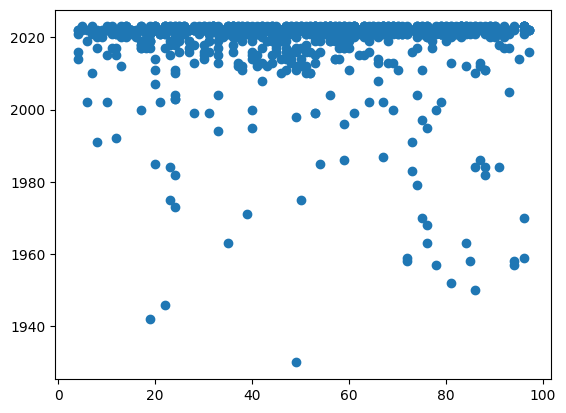

In [29]:
import matplotlib.pyplot as plt

#Example scatterplot, change when topic decided
year_data = Spotify_Data['released_year']
variance_data = Spotify_Data['valence_%']
plt.scatter(year_data, variance_data)
plt.show()


#### Step 3: Clustering Data
In order to cluster data, we will use K-Means. 